## Âàù„ÇÅ„Å¶„ÅÆ„Éô„Ç§„Ç∫Êé®Ë´ñÂÆüÁøí

In [2]:
%matplotlib inline
!pip3 install japanize-matplotlib | tail -n 1
!pip3 install seaborn | tail -n 1
!pip3 install scipy | tail -n 1
!pip3 install pymc | tail -n 1
!pip3 install arviz | tail -n 1
!pip3 install torch | tail -n 1


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [16]:
!pip3 install graphviz | tail -n 1


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
# „É©„Ç§„Éñ„É©„É™„ÅÆimport
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from IPython.display import display
import seaborn as sns
from scipy.special import comb
import pymc as pm
import arviz as az

# NumpyË°®Á§∫ÂΩ¢Âºè„ÅÆË®≠ÂÆö
np.set_printoptions(precision=3, floatmode='fixed')
# „Ç∞„É©„Éï„ÅÆ„Éá„Éï„Ç©„É´„Éà„Éï„Ç©„É≥„ÉàÊåáÂÆö
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (8, 8)
# ÊñπÁúºË°®Á§∫ON
plt.rcParams["axes.grid"] = True
# „Éá„Éº„Çø„Éï„É¨„Éº„É†„Åß„ÅÆË°®Á§∫Á≤æÂ∫¶
pd.options.display.float_format = '{:.3f}'.format
# „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅßÂÖ®„Å¶„ÅÆÈ†ÖÁõÆ„ÇíË°®Á§∫
pd.set_option("display.max_columns", None)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 4.1. ÂïèÈ°åË®≠ÂÆö
```text
  Â∏∏„Å´Á¢∫Áéá„Åå‰∏ÄÂÆö„Åß„ÄÅÂâçÂõû„ÅÆÁµêÊûú„ÅåÊ¨°„Å´‰∏ÄÂàáÂΩ±Èüø„Åó„Å™„ÅÑ„Åè„ÅòÂºï„Åç„Åå„ÅÇ„Çã„ÄÇ
  „ÅÇ„Çã‰∫∫„Åå„Åì„ÅÆ„Åè„ÅòÂºï„Åç„Çí5ÂõûÂºï„ÅÑ„Åü„Å®„Åì„Çç„ÄÅÁµêÊûú„ÅØ„ÄåÂΩì„Åü„Çä„ÄÅ„Éè„Ç∫„É¨„ÄÅ„Éè„Ç∫„É¨„ÄÅÂΩì„Åü„Çä„ÄÅ„Éè„Ç∫„É¨„Äç„Åß„Åó„Åü„ÄÇ
  1Âõû„ÅÆ„Åè„ÅòÂºï„Åç„Å´ÂΩì„Åü„ÇãÁ¢∫Áéá„Çíp„Å®„Åô„Çã„Å®„Åç„ÄÅ„Åì„ÅÆp„ÅÆÂÄ§„ÇíÊ±Ç„ÇÅ„Å™„Åï„ÅÑ„ÄÇ
```

## 4.2. ÊúÄÂ∞§Êé®ÂÆö
- ‰ªäÂõû„ÅÆË©¶Ë°åÁµêÊûú„Å´ÂØæ„Åó„Å¶„ÅØ„ÄÅ
$$
   f(p) =  p^{2} (1 - p)^{3}
$$

„ÅßÂ∞§Â∫¶Èñ¢Êï∞„ÇíË®≠ÂÆö„Åß„Åç„Çã„ÄÇ

Text(0.5, 1.0, 'Â∞§Â∫¶Èñ¢Êï∞')

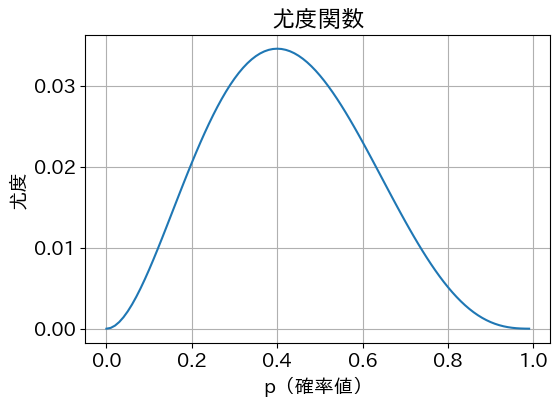

In [4]:
# Â∞§Â∫¶Èñ¢Êï∞„ÅÆ„Ç∞„É©„Éï
def lh(p):
  return p ** 2 * (1 - p) ** 3

# „Ç∞„É©„ÉïÊèèÁîªÁî®xÂ∫ßÊ®ô„ÅÆÂÆöÁæ©
# 0„Åã„Çâ1„Åæ„Åß0.01Âàª„Åø
p = np.arange(0, 1, 0.01)

# „Ç∞„É©„Éï„ÅÆÊèèÁîª
plt.rcParams['figure.figsize'] = (6,4)
plt.plot(p, lh(p), label='Â∞§Â∫¶Èñ¢Êï∞')
plt.xlabel('pÔºàÁ¢∫ÁéáÂÄ§Ôºâ')
plt.ylabel('Â∞§Â∫¶')
plt.title('Â∞§Â∫¶Èñ¢Êï∞')

- Êîπ„ÇÅ„Å¶„ÄÅÊúÄÂ∞§Êé®ÂÆö„ÅØÂ∞§Â∫¶Èñ¢Êï∞„ÅÆÂÄ§„ÅåÊúÄÂ§ß„Å´„Å™„Çã„Éë„É©„É°„Éº„Çøp„ÅÆÂÄ§„ÇíÊ±Ç„ÇÅ„ÇãÊâãÊ≥ï
  - ‰∏äË®ò„ÅÆÁ∞°Âçò„Å™Êï∞Âºè„ÅÆÂ†¥Âêà„ÄÅÂæÆÂàÜË®àÁÆó„ÅßËß£ÊûêÁöÑ„Å´Ëß£„Åë„Çã„Åå„ÄÅÂãæÈÖçÈôç‰∏ãÊ≥ï„ÅßËß£„Åè„ÄÇ

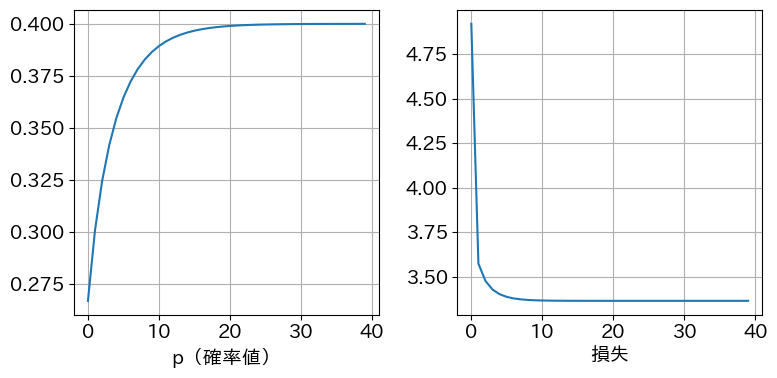

In [5]:
# ÊúÄÂ∞§Êé®ÂÆö„ÅÆÁπ∞„ÇäËøî„ÅóË®àÁÆó
import torch # Á¢∫Áéáp„ÅÆÊúÄÈÅ©Âåñ„ÇíË°å„ÅÜÂæÆÂàÜË®àÁÆó„ÇÑ„ÄÅÂãæÈÖçÈôç‰∏ãÊ≥ï„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™

def log_lh(p): # ÂØæÊï∞Â∞§Â∫¶Èñ¢Êï∞
  return ( 2 * torch.log(p) + 3 * torch.log(1 - p) )

num_epochs = 40 # Áπ∞„ÇäËøî„ÅóÂõûÊï∞
lr = 0.01 # Â≠¶ÁøíÁéá

# „Éë„É©„É°„Éº„Çø„ÅÆÂàùÊúüÂÄ§( p = 0.1 )
# requires_grad = True„ÅßPytorch„ÅØp„ÅÆÂãæÈÖç„ÇíËá™Âãï„ÅßËøΩË∑°„Åó„ÄÅË®àÁÆóÂèØËÉΩ„Å´„Åô„ÇãÔºàÂãæÈÖçÈôç‰∏ãÊ≥ï„Å´„Çà„ÇãÊúÄÈÅ©Âåñ„Å´ÂøÖÈ†àÔºâ
p  = torch.tensor(0.1, dtype = torch.float32, requires_grad=True)

#(„Ç®„Éù„ÉÉ„ÇØÊï∞„ÄÅÁ¢∫ÁéáÂÄ§„ÄÅÊêçÂ§±)„ÅÆ„É≠„Ç∞„ÇíÊ†ºÁ¥ç„Åô„ÇãÂ§âÊï∞
logs = np.zeros((0,3))

for epoch in range(num_epochs):
  loss = -log_lh(p) # ÊêçÂ§±Ë®àÁÆó
  loss.backward() # PyTorch„ÅÆËá™ÂãïÂæÆÂàÜÊ©üËÉΩ„Çí‰Ωø„ÅÑ„ÄÅÊêçÂ§±Èñ¢Êï∞„Å´ÂØæ„Åô„Çã p „ÅÆÂãæÈÖç„ÇíË®àÁÆó
   # ÂãæÈÖç„ÅØ„ÄÅË®àÁÆó„Ç∞„É©„Éï‰∏ä„Åß ÂãæÈÖç„ÇíËøΩË∑°„Åô„Çã„Çà„ÅÜ„Å´Ë®≠ÂÆö„Åï„Çå„Åü„ÉÜ„É≥„ÇΩ„É´Ôºàrequires_grad=TrueÔºâ„Å´ÂØæ„Åó„Å¶Ë®àÁÆó
   # „Éë„É©„É°„Éº„Çø p „Å´ÂØæ„Åó„Å¶ requires_grad=True „ÅåË®≠ÂÆö„Åï„Çå„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅloss.backward() „ÇíÂÆüË°å„Åô„Çã„Å®„ÄÅp „Å´ÂØæ„Åô„ÇãÂãæÈÖç„ÅåË®àÁÆó„Åï„Çå„Åæ„Åô„ÄÇ
   # „Åù„ÅÆÂãæÈÖç„ÅØ p.grad „Å´Ê†ºÁ¥ç
  with torch.no_grad(): # ÂãæÈÖç„ÅÆËøΩË∑°„ÇíÂÅúÊ≠¢„Åó„ÄÅ„Éë„É©„É°„Éº„Çø p „ÇíÊõ¥Êñ∞
    p -= lr * p.grad
    p.grad.zero_()
  log = np.array([epoch, p.item(), loss.item()]).reshape(1,-1)
  logs = np.vstack((logs, log)) # Ë®òÈå≤„Åó„Åü„Éá„Éº„Çø„Çí logs „Å´‰øùÂ≠ò

# ‰∏ä„ÅÆ„Éó„É≠„Ç∞„É©„É†„Åß„ÅØÂ∞§Â∫¶Èñ¢Êï∞„ÅÆ‰ª£„Çè„Çä„Å´„Åù„ÅÆÂØæÊï∞„ÇíÂèñ„Å£„ÅüÂØæÊï∞Â∞§Â∫¶Èñ¢Êï∞„ÇíÁî®„ÅÑ„ÄÅ
# „Åï„Çâ„Å´„Åù„ÅÆ„Éû„Ç§„Éä„Çπ„ÇíÂèñ„Å£„ÅüÂÄ§„ÇíÊêçÂ§±„Å®„Åó„Å¶Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ„Åß„ÅÆÂæÆÂàÜË®àÁÆóÂØæË±°„Å®„Åó„Å¶„ÅÑ„Çã„ÄÇ
# Ë®àÁÆó„ÅÆÈÄî‰∏≠ÁµåÈÅé„ÅØÂÖ®„Å¶Â§âÊï∞logs„Å´‰øùÂ≠ò„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

plt.rcParams['figure.figsize'] = (8,4)
fig, axes = plt.subplots(1, 2)
axes[0].plot(logs[:,0], logs[:,1])
axes[0].set_xlabel('pÔºàÁ¢∫ÁéáÂÄ§Ôºâ')
axes[1].plot(logs[:,0], logs[:,2])
axes[1].set_xlabel('ÊêçÂ§±')

plt.tight_layout()
plt.show()






- ÁµêÊûú„Å®„Åó„Å¶„ÄÅ
  - 0.4„ÅÆÁ¢∫ÁéáÂÄ§„ÅåÁπ∞„ÇäËøî„ÅóË®àÁÆó„ÅßÂ∞éÂá∫„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ
- ‰ªäÂõû„ÅÆÂïèÈ°å„ÅØ„ÄÅÊ±Ç„ÇÅ„Çã„Éë„É©„É°„Éº„Çø„Ååp‰∏Ä„Å§„Å†„Åë„Å®„ÅÑ„ÅÜ„Å®„Å¶„ÇÇ„Ç∑„É≥„Éó„É´„Å™ÂïèÈ°å„ÄÇ
- Á¢∫ÁéáÂÄ§ p „ÇíÊ±Ç„ÇÅ„ÇãÂïèÈ°å„Å®„ÄÅÁ∑öÂΩ¢ÂõûÂ∏∞„ÅßÔºàw_0 , w_1Ôºâ„ÇíÊ±Ç„ÇÅ„ÇãÂïèÈ°å„ÅÆÈñì„Å´„ÅØ„ÄÅÊé®ÂÆö„Åô„Çã„Éë„É©„É°„Éº„Çø„Çí„Å©„ÅÜÊ±∫ÂÆö„Åô„Çã„Åã„Å®„ÅÑ„ÅÜÂÖ±ÈÄöÁÇπ„Åå„ÅÇ„Çä„Åæ„Åô
  - „Éë„É©„É°„Éº„Çø„Çí
  $$
    y = w_0 + w_1 x
  $$
  „Å®„ÅÑ„ÅÜ‰∏ÄÊ¨°Èñ¢Êï∞„ÅÆÂÇæ„Åç„Å®ÂÆöÊï∞„Å´Âèñ„ÇäÊõø„Åà„Çã„Å®„ÄÅÁ∑öÂΩ¢ÂçòÂõûÂ∏∞„Å´„Å™„Çã„ÄÇ

- Á∑öÂΩ¢ÂçòÂõûÂ∏∞„ÅÆÂïèÈ°å„Å´ÊúÄÂ∞§Êé®ÂÆö„ÇíÈÅ©Áî®„Åô„Çã„Å®„ÄÅÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„ÅÆÁµÑ„ÅøÔºàw_0 , w_1Ôºâ„ÅåÊ±Ç„Åæ„Çã„ÄÇ
  - „Åì„Çå„ÅåÈÄöÂ∏∏„ÅÆÊ©üÊ¢∞Â≠¶Áøí„ÅÆË£è„Åß„ÇÑ„Å£„Å¶„ÅÑ„ÇãÂá¶ÁêÜ

- Âêå„ÅòÁ∑öÂΩ¢ÂõûÂ∏∞„ÅÆÂïèÈ°å„Å´ÂØæ„Åó„Å¶„Éô„Ç§„Ç∫Êé®Ë´ñ„ÇíÈÅ©Áî®„Åô„Çã„Åì„Å®„ÇÇÂèØËÉΩ„ÄÇ
  - „Åì„ÅÆÂ†¥Âêà„ÄÅ„Éë„É©„É°„Éº„ÇøÔºàw_0 , w_1Ôºâ„Åå„Åù„Çå„Åû„Çå„ÄÅÁ¢∫ÁéáÂàÜÂ∏É„Å®„Åó„Å¶Ê±Ç„ÇÅ„Çâ„Çå„Çã„Åì„Å®„Å´„Å™„Çã

In [6]:
print(np.array([epoch, p.item(), loss.item()]).reshape(1,-1))
print(np.array([epoch, p.item(), loss.item()]).reshape(3,-1))
print(np.array([epoch, p.item(), loss.item()]))

[[39.000  0.400  3.365]]
[[39.000]
 [ 0.400]
 [ 3.365]]
[39.000  0.400  3.365]


## „Éô„Ç§„Ç∫Êé®Ë´ñÔºàÁ¢∫Áéá„É¢„Éá„É´ÂÆöÁæ©Ôºâ
- ÊúÄÂ∞§Êé®ÂÆöÂêåÊßò„Å´„ÄÅÂêå„ÅòÂïèÈ°å„Å´ÂØæ„Åó„Å¶„Éô„Ç§„Ç∫Êé®Ë´ñ„ÅßÂèñ„ÇäÁµÑ„Çì„Åß„Åø„Çã

- „Éô„Ç§„Ç∫Êé®Ë´ñ„Éó„É≠„Ç∞„É©„Éü„É≥„Ç∞„ÅÆÊâãÈ†Ü
  - 1. „Éá„Éº„ÇøÊ∫ñÂÇô
    - pandas, Numpy„Å™„Å©„Åß
  - 2. Á¢∫Áéá„É¢„Éá„É´ÂÆöÁæ©
    - Á¢∫ÁéáÂ§âÊï∞„ÅÆÈñ¢‰øÇ„ÇíÁ¢∫Áéá„É¢„Éá„É´Âåñ„Åó„ÄÅPyMC„Å´„Çà„ÇäË®òËø∞
  - 3. „Çµ„É≥„Éó„É™„É≥„Ç∞
    - PyMC„ÅÆsampleÈñ¢Êï∞„Åß„Çµ„É≥„Éó„É™„É≥„Ç∞„Éá„Éº„Çø„ÅÆÁîüÊàê
  - 4. ÁµêÊûúÂàÜÊûê
    - ‰∏ª„Å´Arviz„É©„Ç§„Éñ„É©„É™„ÇíÁî®„ÅÑ„Å¶„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„ÇíÁµ±Ë®àÁöÑ„Å´ÂàÜÊûê


In [7]:
# „Éá„Éº„ÇøÊ∫ñÂÇô
X = np.array([1, 0,  0, 1, 0])
X

array([1, 0, 0, 1, 0])

In [14]:
# Á¢∫Áéá„É¢„Éá„É´ÂÆöÁæ©„ÄÄÔºù„ÄÄPyMC„ÅßË°®Áèæ„Åô„Çã

model1 = pm.Model()

with model1:
  # pm.Uniform()„ÅØ‰∏ÄÊßòÂàÜÂ∏É„ÇíË°®„Åô
  p = pm.Uniform('p', lower = 0.0, upper = 1.0)
  
  # pm.Bernoulli()„ÅØ„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÇíË°®„Åô
  X_obs = pm.Bernoulli('X_obs', p=p, observed = X)

1. Á¢∫ÁéáÂ§âÊï∞Èñì„ÅÆÈñ¢‰øÇÊÄßÔºö‰∏ÄÊßòÂàÜÂ∏É„ÅÆÁ¢∫ÁéáÂ§âÊï∞p„Åå„ÄÅÊ¨°„ÅÆ„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÅÆ„Ç≥„É≥„Çπ„Éà„É©„ÇØ„Çø„Å´ÂØæ„Åó„Å¶Á¢∫ÁéáÂÄ§„ÇíÁ§∫„ÅôÂºïÊï∞„Å®„Åó„Å¶Ê∏°„Åï„Çå„Çã
   1. = ‰∫ãÂâçÂàÜÂ∏É„ÅåË©≤ÂΩì
2. Ë¶≥Ê∏¨ÂÄ§„Å®„ÅÆÈñ¢‰øÇÊÄßÔºö‰∫ãÂâç„Å´Ê∫ñÂÇô„Åó„ÅüË¶≥Ê∏¨ÂÄ§„ÇíË°®„ÅôX„Åå„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÅÆ„Ç≥„É≥„Çπ„Éà„É©„ÇØ„Çø„Å´ÂØæ„Åó„Å¶observedÂºïÊï∞„Å®„Åó„Å¶Ê∏°„Åï„Çå„Çã„ÄÇ
   1. = Ë¶≥Ê∏¨ÂÄ§„ÅåË©≤ÂΩì

- ÂÖ∑‰ΩìÁöÑ„Å™ÊµÅ„Çå
  - ‰∏ÄÊßòÂàÜÂ∏É„ÅåÁîüÊàê„Åô„ÇãÁ¢∫ÁéáÂ§âÊï∞ p „ÅØ„ÄÅ0.0ÔΩû1.0„ÅÆÈñì„Åß„Å©„ÅÆÂÄ§„Åß„ÇÇÁ≠â„Åó„ÅÑÁ¢∫Áéá„ÅßÂèñ„ÇäÂæó„ÇãÂÄ§„Åß„Åô„ÄÇ
  - „Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÅØ„ÄÅ„Åù„ÅÆ p „Çí‰Ωø„Å£„Å¶„ÄÅË©¶Ë°åÔºà‰æã„Åà„Å∞„Ç≥„Ç§„É≥„ÇíÊäï„Åí„ÇãÔºâ„ÅÆÊàêÂäüÁ¢∫Áéá„Å®„Åó„Å¶Êâ±„ÅÑ„ÄÅ0ÔºàÂ§±ÊïóÔºâ„Åã1ÔºàÊàêÂäüÔºâ„ÅÆÂÄ§„ÇíÁîüÊàê„Åó„Åæ„Åô

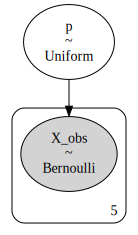

In [17]:
# Á¢∫Áéá„É¢„Éá„É´„ÅÆÂèØË¶ñÂåñ
g = pm.model_to_graphviz(model1)
display(g)

- Âõ≥„ÅÆÊÑèÂë≥
  1. ‰∏∏„ÅßÁ§∫„Åï„Çå„Çã„Éé„Éº„Éâ„ÅåÁ¢∫ÁéáÂàÜÂ∏É„ÇíÁ§∫„Åô
  2. „Éé„Éº„ÉâÂÜÖ„ÅÆ‰∏ä„ÅÆË°®Ë®ò„ÅåÁ¢∫ÁéáÂ§âÊï∞Âêç„ÄÅ‰∏ã„ÅåÁ¢∫ÁéáÂàÜÂ∏É„ÇØ„É©„ÇπÂêç
  3. Áü¢Âç∞„Å´„Çà„ÇäÁ¢∫ÁéáÂ§âÊï∞Èñì„ÅÆÈñ¢‰øÇÊÄß„ÅåÁ§∫„Åï„Çå„Çã
  4. Áπ∞„ÇäËøî„ÅóÊßãÈÄ†„ÅØÊû†„ÅßÂõ≤„Çì„ÅßÁ§∫„Åô
  5. Êû†„ÅÆÂè≥‰∏ã„ÅÆÊï∞Â≠ó„ÅØÁπ∞„ÇäËøî„ÅóÊï∞
  6. Ëâ≤„Åå„Å§„ÅÑ„Åü„Éé„Éº„Éâ„ÅØ„ÄÅË¶≥Ê∏¨ÂÄ§„Åå„ÅÇ„Çã„Åì„Å®„ÇíÁ§∫„Åô

## „Éô„Ç§„Ç∫Êé®Ë´ñÔºà„Çµ„É≥„Éó„É™„É≥„Ç∞Ôºâ
- „Çµ„É≥„Éó„É™„É≥„Ç∞ÊôÇ„Å´„Éá„Éï„Ç©„É´„ÉàÂÄ§„Åã„ÇâÂ§âÊõ¥„Åô„Çã„Åì„Å®„ÅÆÂ§ö„ÅÑÈáçË¶Å„Å™3„Å§„ÅÆ„Éë„É©„É°„Éº„Çø
  - „Çµ„É≥„Éó„É™„É≥„Ç∞„ÅØPyMC„Å´„Åä„ÅÑ„Å¶Ê†πÂππÁöÑ„Å™Ê©üËÉΩÔºà„Åù„ÅÆ„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÄÄMCMC:Markov Chain Monte Carlo„ÅØÂÖ•ÈñÄÊõ∏„ÅÆÁØÑÂõ≤Â§ñÔºâ
  - „Ç§„É°„Éº„Ç∏ÔºöË¶≥Ê∏¨ÂÄ§„ÇíÊ∫Ä„Åü„Åô„Çà„ÅÜ„Å™„ÄÅ‰∫ãÂâçÂàÜÂ∏É„Å´Âæì„ÅÜ‰π±Êï∞Ôºà„Çµ„É≥„Éó„É´ÂÄ§Ôºâ„ÇíË®àÁÆó„Åó„Å¶„ÅÑ„Åè„ÄÇ
    - ‰π±Êï∞Ôºà„Çµ„É≥„Éó„É´ÂÄ§Ôºâ„ÅØÁ¢∫ÁéáÂ§âÊï∞„ÅåÈÄ£Á∂öÂàÜÂ∏É„Å´Âæì„ÅÜÂ†¥Âêà„ÄÅ1„Å§Ââç„ÅÆÂÄ§„Åã„ÇâÂ∞ë„ÅóÂ§â„Åà„ÅüÂÄ§„Å´„Å™„Çã„ÄÇ
    - „Å§„Åæ„Çä„ÄÅÂâç„ÅÆ‰π±Êï∞Ôºà„Çµ„É≥„Éó„É´ÂÄ§Ôºâ„ÇíÂèó„Åë„Å¶Ê¨°„ÅÆ‰π±Êï∞Ôºà„Çµ„É≥„Éó„É´ÂÄ§Ôºâ„ÅåÂÆö„Åæ„Çã
  1. __chains__ „Éë„É©„É°„Éº„Çø
    - „Çµ„É≥„Éó„É´ÂÄ§Á≥ªÂàó„ÄÄ„Å®„ÅÑ„ÅÜÊ¶ÇÂøµ
    - „Çµ„É≥„Éó„É´„ÅÆÂàùÊúüÂÄ§„ÅåÁï∞„Å™„Çã„Å®„ÄÅÂÖ®„ÅèÂà•„ÅÆÂÇæÂêë„Çí„ÇÇ„Å£„Åü„Çµ„É≥„Éó„É´ÂÄ§Á≥ªÂàó„Åå„Åß„Åç„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„ÄÇ
    - __ÂàùÊúüÂÄ§„ÇíÂ§â„Åà„Å¶Ë§áÊï∞„ÅÆ„Çµ„É≥„Éó„É´ÂÄ§Á≥ªÂàó„ÅßÁµêÊûú„ÇíÁ¢∫Ë™ç„Åô„Çã‰ªïÁµÑ„Åø__ „ÇísampleÈñ¢Êï∞„ÅØÊåÅ„Å£„Å¶„ÅÑ„Çã„ÄÇ
    - „Åù„ÅÆ„Åü„ÇÅ„ÅÆ„Éë„É©„É°„Éº„Çøchains
      - „Éá„Éï„Ç©„É´„ÉàÂÄ§Ôºí„Åß„ÄÅ„Çà„ÇäÂ§ß„Åç„Å™Êï∞„Å´Â§âÊõ¥„Åô„Çã„Åì„Å®„ÅßÂæó„Çâ„Çå„ÅüÁ¢∫ÁéáÂàÜÂ∏É„Åå„Åü„Åæ„Åü„ÅæÁâπÂÆö„ÅÆÂàùÊúü„Çµ„É≥„Éó„É´ÂÄ§„ÅßÁô∫Áîü„Åó„Åü„ÇÇ„ÅÆ„Å™„ÅÆ„Åã„ÄÅ‰∏ÄËà¨ÁöÑ„Å™„ÇÇ„ÅÆ„Åã„ÇíÂà§Êñ≠„Åß„Åç„Çã„ÄÇ
  2. __tune__ „Éë„É©„É°„Éº„Çø
    - sampleÈñ¢Êï∞ÂÜÖÈÉ®„ÅÆMCMC„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅØ„ÄÅ„ÅÜ„Åæ„ÅèÂàùÊúüÂÄ§„Å®Â§âÊõ¥Èáè„ÇíÈÅ∏„Å∂„Å®„ÄÅ
      - __„Çµ„É≥„Éó„É´ÂÄ§„ÅÆÂ§âÂåñ„Åå„Å¶‰ª•‰∏äÁä∂ÊÖã„Å´„Å™„ÇãÊÄßË≥™__„ÄÄ„ÇíÊåÅ„Å§
    - „Å§„Åæ„Çä„ÄÅ„Çµ„É≥„Éó„É´ÂÄ§Á≥ªÂàó„ÅßË¶ã„ÅüÊôÇ„Å´„ÄÅ__ÂàùÊúüÁä∂ÊÖã„Åå‰∏çÂÆâÂÆö„Åß„ÄÅÂæê„ÄÖ„Å´ÁµêÊûú„ÅåÂÆâÂÆö„Åó„Å¶„Åè„ÇãÂÇæÂêë__ „Åå„ÅÇ„Çã„ÄÇ
    - „Åù„ÅÆ„Åü„ÇÅ„ÄÅ__‰∏çÂÆâÂÆö„Å™„Åì„Å®„ÅåÂ§ö„ÅÑÂàùÊúüÁä∂ÊÖã„ÅÆ„Çµ„É≥„Éó„É´ÂÄ§„ÇíÂàÜÊûêÂØæË±°„Åã„ÇâÂ§ñ„Åô__„ÄÄ„Åü„ÇÅ„ÅÆ„Éë„É©„É°„Éº„Çø
    - „Éá„Éï„Ç©„É´„ÉàÂÄ§„ÅØ1000

  3. __draws__ „Éë„É©„É°„Éº„Çø
    - tune„Å®ÈÄÜ„Åß„ÄÅ__ÂàÜÊûêÂØæË±°„Å®„Åó„Å¶Âà©Áî®„Åï„Çå„Çã„Çµ„É≥„Éó„É´Êï∞__„ÄÄ„ÇíÁ§∫„Åô„ÄÇ
    - Âêå„Åò„Åè„Éá„Éï„Ç©„É´„ÉàÂÄ§„ÅØ1000
    - Ë§áÈõë„Å™ÊßãÊàê„ÅÆÁ¢∫Áéá„É¢„Éá„É´„ÅÆÂ†¥Âêà„ÄÅ __‰∫àÊ∏¨ÁµêÊûú„Çí„Çà„ÇäÁ¢∫ÂÆü„Å™„ÇÇ„ÅÆ„Å®„Åô„Çã„Åü„ÇÅ„ÄÅ„Åì„ÅÆÂÄ§„Çí„Éá„Éï„Ç©„É´„Éà„Çà„ÇäÂ§ß„Åç„Åè„Åô„Çã„Åì„Å®„Åå‰∏ÄËà¨ÁöÑ__

  „Åæ„Å®„ÇÅ. ÂàÜÊûêÂèØËÉΩ„Å™„Çµ„É≥„Éó„É´Êï∞„ÅØ„ÄÅNumpy„ÅÆshape„ÅßË°®„Åô„Å®„ÄÅ(chains, draws) ÂÄã


  Ë£úË∂≥„Éë„É©„É°„Éº„Çø. 
    - __target_accept__ „Éë„É©„É°„Éº„Çø
      - „Éô„Ç§„Ç∫Êé®Ë´ñ„ÅÆÂèéÊùü„Åå‰∏çÂçÅÂàÜ„Å™Â†¥Âêà„Å´Âà©Áî®„Åô„Çã„ÉÅ„É•„Éº„Éã„É≥„Ç∞„Éë„É©„É°„Éº„Çø„Å®„ÅÑ„ÅÜÁêÜËß£„Åß„Å≤„Å®„Åæ„ÅöOK
    - __init__ „Éë„É©„É°„Éº„Çø
      - „Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÂàùÊúüÂÄ§„ÇíÊ±∫ÂÆö„Åô„Çã„Ç¢„É´„Ç¥„É™„Ç∫„É†„Å´Èñ¢„Åô„Çã„Éë„É©„É°„Éº„Çø
    - __step__ „Éë„É©„É°„Éº„Çø
      - 1„Å§Ââç„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞ÂÄ§„Åã„ÇâÊ¨°„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞ÂÄ§„ÇíË®àÁÆó„Åô„Çã„Åü„ÇÅ„ÅÆ„Ç¢„É´„Ç¥„É™„Ç∫„É†
    
    - init,step„ÅÆ„Éë„É©„É°„Éº„Çø„ÇÇÈ´òÂ∫¶„ÅÆÊï∞Â≠¶ÁöÑÁü•Ë≠ò„ÅåÂøÖË¶Å„ÄÇ„ÄÇ
      - ÊúÄÂàù„ÅÆÊÆµÈöé„Åß„ÅØ„ÉÅ„É•„Éº„Éã„É≥„Ç∞„Åó„Å¶‰Ωø„ÅÜÂøÖË¶Å„ÅØ„Å™„Åè„Éá„Éï„Ç©„É´„ÉàÂÄ§„ÅßÂçÅÂàÜ„ÄÇÔºàÊú¨Êõ∏„Åß„ÅØÂ≠òÂú®„ÅÆË™çÁü•„Å†„Åë„ÅßOKÔºâ
    



In [18]:
# „Éë„É©„É°„Éº„ÇøÂÄ§„ÇíÊòéÁ§∫ÁöÑ„Å´Ë®≠ÂÆö„Åó„Å¶„Çµ„É≥„Éó„É™„É≥„Ç∞
with model1:
  idata1_1 = pm.sample(
    # ‰π±Êï∞Á≥ªÂàó„ÅÆÊï∞Ôºà„Éá„Éï„Ç©„É´„ÉàÔºâ
    chains = 3,
    # Êç®„Å¶„Çã„Çµ„É≥„Éó„É´Êï∞
    tune = 2000,
    # ÂèñÂæó„Åô„Çã„Çµ„É≥„Éó„É´Êï∞
    draws = 2000,
    random_seed = 42
  )

# ÂêÑchain„Åß2000Ôºã2000„ÅÆ4000„Çµ„É≥„Éó„É´„ÅåÂæó„Çâ„Çå„Çã
# ÂàÜÊûê„Å´‰Ωø„Çè„Çå„Çã„ÅÆ„ÅØ2000„Çµ„É≥„Éó„É´

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [p]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 18 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [19]:
# „Éá„Éï„Ç©„É´„ÉàÂÄ§„Åß„Çµ„É≥„Éó„É™„É≥„Ç∞
with model1:
  idata1_2 = pm.sample(
    random_seed = 42
  )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


## „Éô„Ç§„Ç∫Êé®Ë´ñÔºàÁµêÊûúÂàÜÊûêÔºâ
- Âõ†ÊûúÈñ¢‰øÇ„Åß„ÅØ
  1. ‰∏ÄÊßòÂàÜÂ∏É„Åã„ÇâÁ¢∫ÁéáÂ§âÊï∞p„ÅåÂá∫Âäõ
  2. „Åù„ÅÆp„ÇíÂºïÊï∞„Å´„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÅåÂÆö„Åæ„Çã
  3. ÊúÄÂæå„Å´„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„Å´Âæì„ÅÜÁ¢∫ÁéáÂ§âÊï∞„Å®„Åó„Å¶Ë¶≥Ê∏¨ÂÄ§„ÅåÂæó„Çâ„Çå„Çã

- ÂÆüÈöõ„ÅÆ„Éô„Ç§„Ç∫Êé®Ë´ñ„Åß„ÅØ„ÄÅÈÄÜ
  1. Ë¶≥Ê∏¨ÂÄ§
  2. „Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÇíÁµåÁî±
  3. ÂÖÉ„ÄÖ‰∏ÄÊßòÂàÜÂ∏É„Å†„Å£„ÅüÁ¢∫ÁéáÂ§âÊï∞p„ÅÆ‰∫ãÂæåÂàÜÂ∏É„Åå„Çµ„É≥„Éó„É´ÂÄ§„ÅÆÈÖçÂàó„Å®„Åó„Å¶Âæó„Çâ„Çå„Çã
    - „Åì„ÅÆ„Çµ„É≥„Éó„É´ÂÄ§„Å´Âá¶ÁêÜ„ÇíË°å„ÅÑ„ÄÅ‰∫ãÂæåÂàÜÂ∏É„ÅÆÊÄßË≥™„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ
    - „ÅÑ„Çè„Å∞„ÄÅÊú¨Êù•„ÅÆÂõ†ÊûúÈñ¢‰øÇ„ÅÆÈÄÜÊñπÂêë„Åß‰∫ãÂæåÂàÜÂ∏É„ÇíÊé®Ë´ñ„Åô„ÇãÔºù„ÄÄ__„Åì„Åì„Åå„Éô„Ç§„Ç∫Êé®Ë´ñ„ÅÆÊú¨Ë≥™__


```text
  ÁµêÊûúÂàÜÊûê„ÅßÂÆüÊñΩ„Åô„Çã„Åì„Å®
  1. „Çµ„É≥„Éó„É™„É≥„Ç∞„ÅåÊ≠£Â∏∏„Å´„Åß„Åç„Å¶„ÅÑ„Çã„Åì„Å®
  2. ÂèØË¶ñÂåñ„Å´„Çà„ÇãÁ¢∫ÁéáÂàÜÂ∏É„ÅÆÁ¢∫Ë™ç
  3. Áµ±Ë®àÂàÜÊûê„Å´„Çà„ÇãÁ¢∫ÁéáÂàÜÂ∏É„ÅÆÁ¢∫Ë™ç
  ‰∏äË®ò„Åß„Çà„Åè‰Ωø„Çè„Çå„ÇãÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅßË™¨Êòé„Åô„Çã
```

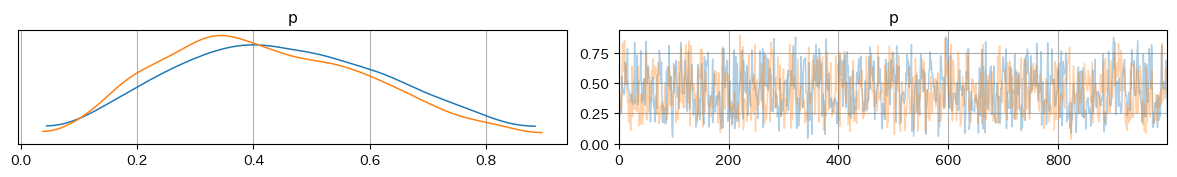

In [24]:
# plot_trace()„Åß„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„ÇíÂèØË¶ñÂåñ
# „Çµ„É≥„Éó„É™„É≥„Ç∞„ÅåÊ≠£Â∏∏„Å´„Åß„Åç„Å¶„ÅÑ„Çã„Åì„Å®„ÅÆÁ¢∫Ë™ç„ÅßÂà©Áî®„Åô„Çã

az.plot_trace(idata1_2, compact = False) # compact = False„ÅßË§áÊï∞„ÅÆ„Çµ„É≥„Éó„É´ÂÄ§Á≥ªÂàó„ÅÆËâ≤ÂàÜ„Åë
plt.tight_layout() # „Ç∞„É©„Éï„ÅÆÈáç„Å™„Çä„ÇíËß£Ê∂à

- Â∑¶„ÅÆ„Ç∞„É©„Éï
  - Á¢∫ÁéáÂ§âÊï∞„ÅÆÂÄ§„Å®Áô∫ÁîüÈ†ªÂ∫¶
  - ‚Äª ÂàÜÊûêÂØæË±°„ÅÆÁ¢∫ÁéáÂ§âÊï∞„ÅåÈÄ£Á∂öÂàÜÂ∏É„ÅÆ„Å®„Åç„ÄÅ‰∏ÄÊó¶„Éí„Çπ„Éà„Ç∞„É©„É†„Çí‰Ωú„Å£„Å¶„Åù„Çå„ÇíÈÄ£Á∂öÁöÑ„Å™Èñ¢Êï∞„ÅßËøë‰ºº„Åó„Å¶„ÅÑ„Çã„ÄÇÔºàÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„Å´Ë©≤ÂΩìÔºâ
    - Á¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„Å´„Åä„ÅÑ„Å¶„ÅØ„ÄÅÁõ∏ÂØæÁöÑ„Å™ÂÄ§„Å´ÊÑèÂë≥„Åå„ÅÇ„Çä„ÄÅÁµ∂ÂØæÁöÑ„Å™ÂÄ§„ÅØ„ÅÇ„Åæ„ÇäÊÑèÂë≥„ÇíÊåÅ„Åü„Å™„ÅÑ„ÄÇÔºàÂ∑¶Âõ≥„ÅÆÁ∏¶Ëª∏„Å´„Çπ„Ç±„Éº„É´„Åå„Å™„ÅÑÁêÜÁî±Ôºâ
      ```text
      Áõ∏ÂØæÁöÑ„Å™ÂÄ§„Å´ÊÑèÂë≥„Åå„ÅÇ„Çä„ÄÅÁµ∂ÂØæÁöÑ„Å™ÂÄ§„ÅØ„ÅÇ„Åæ„ÇäÊÑèÂë≥„ÇíÊåÅ„Åü„Å™„ÅÑ„ÄÇ„ÄÄ
      „ÄÄÔºù„ÄÄ„ÅÇ„Åè„Åæ„ÅßË¶ã„Çå„Çã„ÅÆ„ÅØ‰ªñ„ÅÆÂ†¥ÊâÄ„Å®ÊØî„Åπ„Å¶„Å©„Åì„Å´„Éá„Éº„Çø„ÅåÈõÜ‰∏≠„Åó„Å¶„ÅÑ„Çã„Åã„Å®„ÅÑ„ÅÜË©±„Å†„Åã„Çâ

      Á¢∫Áéá„ÅØÂå∫Èñì„Å´ÂØæ„Åó„Å¶ÂÆöÁæ©„Åï„Çå„ÄÅ„Åù„ÅÆÂå∫ÈñìÂÜÖ„ÅÆÁ¢∫Áéá„ÅØ„ÄÅÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„ÅÆ‰∏ã„Å´„ÅÇ„ÇãÈù¢Á©ç„Å®„Åó„Å¶Ë®àÁÆó„Åï„Çå„Åæ„ÅôÔºàÁ©çÂàÜ„Å´„Çà„Å£„Å¶Ôºâ„ÄÇ
      „Åó„Åü„Åå„Å£„Å¶„ÄÅÁ¢∫ÁéáÂØÜÂ∫¶„ÅåÂ§ß„Åç„ÅÑÂ†¥ÊâÄ„Åª„Å©„Äå„Åù„ÅÆÁØÑÂõ≤„Å´„Éá„Éº„Çø„ÅåÈõÜ‰∏≠„Åó„Å¶„ÅÑ„Çã„Äç„Å®„ÅÑ„ÅÜÁõ∏ÂØæÁöÑ„Å™ÊÑèÂë≥„ÇíÊåÅ„Å°„Åæ„Åô„Åå„ÄÅÁ¢∫ÁéáÂØÜÂ∫¶Ëá™‰Ωì„ÅÆÁµ∂ÂØæÂÄ§„Åå„ÄåÁ¢∫Áéá„Äç„Åß„ÅØ„Å™„ÅÑ„ÅÆ„Åß„Åô„ÄÇ
      ```
    - „Åì„ÅÆ„Ç∞„É©„Éï„Åß2„Å§„ÅÆ„Ç∞„É©„ÉïÂΩ¢„ÅåËøë„Åã„Å£„Åü„Çâ„Éô„Ç§„Ç∫Êé®Ë´ñ„ÅÆ„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅåÊ≠£„Åó„ÅèÂãï„ÅÑ„Å¶„ÅÑ„Çã„Åì„Å®„ÇíÊÑèÂë≥„Åô„Çã„ÄÇÊ•µÁ´Ø„Å´Áï∞„Å™„Çã„Å™„Çâ‰∏çÂÖ∑Âêà„ÄÇ
- Âè≥„ÅÆ„Ç∞„É©„Éï
  - Ê®™Ëª∏„ÅåÁπ∞„ÇäËøî„ÅóÊï∞„ÄÅÁ∏¶Ëª∏„ÅåÂàÜÊûêÂØæË±°„ÅÆÁ¢∫ÁéáÂ§âÊï∞„ÅÆÂÄ§„Å®„Åó„Å¶ÂÄ§„ÅÆÂ§âÂåñ„ÇíË¶ã„Å¶„ÅÑ„Çã„ÄÇ
  - Á¢∫ÁéáÂ§âÊï∞„ÅÆÂÄ§„ÅÆËª∏„ÅåÂ∑¶„ÅÆ„Ç∞„É©„Éï„Åß„ÅØÊ®™Ëª∏„ÄÅÂè≥„ÅÆ„Ç∞„É©„Éï„Åß„ÅØÁ∏¶Ëª∏
    - Á∏¶Ëª∏„ÅÆÂÄ§„Åå‰∏ÄÂÆöÁØÑÂõ≤„Çí‰ΩïÂ∫¶„ÇÇË°å„ÅçÊù•„Åó„Å¶„ÅÑ„ÇãÁä∂ÊÖã„ÅåÊ≠£„Åó„ÅÑË°åÂãï

Text(0.5, 1.0, '„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ÂàùÊúüÁâà')

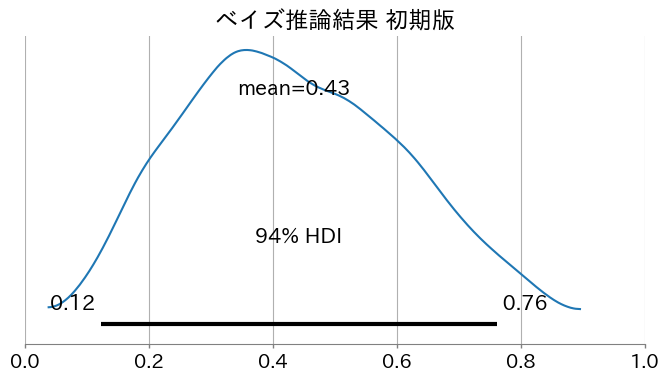

In [25]:
# plot_posterior()„ÅßÁ¢∫ÁéáÂàÜÂ∏É„ÇíÂèØË¶ñÂåñ
ax = az.plot_posterior(idata1_2)
ax.set_xlim(0, 1) # xËª∏„ÅÆÁØÑÂõ≤„Çí0„Åã„Çâ1„Å´ÈôêÂÆö
ax.set_title('„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ÂàùÊúüÁâà') # „Çø„Ç§„Éà„É´„ÅÆË®≠ÂÆö

- ‰∏äË®ò„Ç∞„É©„Éï„ÅßË¶ã„Çå„Çã„Éê„Éº„ÄÄÔºù„ÄÄ94%HDI„ÅÆÁØÑÂõ≤
  - „Åì„Åì„ÅåÊúÄÁµÇÁöÑ„Å´Âà©Áî®„Åï„Çå„Çã
  - hdi_prob„Ç™„Éó„Ç∑„Éß„É≥„Éë„É©„É°„Éº„Çø„ÅßÂ§âÊõ¥ÂèØËÉΩ

In [26]:
# summary()„ÅßÁµ±Ë®àÈáè„ÇíË°®Á§∫
summary1_2 = az.summary(idata1_2)
display(summary1_2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p 0.434 0.177   0.123    0.761      0.006    0.004   873.000  1315.000  1.000

- mcse_mean‰ª•Èôç„ÅÆÂêÑÈ†ÖÁõÆ„ÅØ„Éô„Ç§„Ç∫Êé®Ë´ñ„ÅÆ„Ç¢„É´„Ç¥„É™„Ç∫„É†„ÅåÊ≠£„Åó„ÅèÊ©üËÉΩ„Åó„Å¶„ÅÑ„Çã„Åã„ÅÆÊåáÊ®ô
- ÁõÆÂÆâ
  - mcse_mean: 0.01‰ª•‰∏ã
  - ess_bulk: 400‰ª•‰∏ä
  - r_hat: 1.01‰ª•‰∏ã

- Áï•Áß∞
  - mcse„ÅØ„É¢„É≥„ÉÜ„Ç´„É´„É≠Ê®ôÊ∫ñ„Ç®„É©„Éº„ÅÆÁï•Áß∞
  - ess„ÅØÊúâÂäπ„Çµ„É≥„Éó„É´„Çµ„Ç§„Ç∫„ÅÆÁï•Áß∞

### „Åì„Åì„Åæ„Åß„ÅÆ„Åæ„Å®„ÇÅ
1. ÊÉÖÂ†±„Åå„Çè„Åã„ÇãÂâç„ÅÆÁä∂ÊÖãÔºà‰∫ãÂâçÂàÜÂ∏ÉÔºâ
    - ‰∫ãÂâçÂàÜÂ∏É„Å®„Åó„Å¶„ÄÅ‰∏ÄÊßòÂàÜÂ∏É„Çí‰ªÆÂÆö„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åì„ÅÆ‰∏ÄÊßòÂàÜÂ∏É„ÅØ„ÄÅÁ¢∫Áéá ùëùÔºà‰æã„Åà„Å∞„ÄÅ„Ç≥„Ç§„É≥„ÅåË°®„ÇíÂá∫„ÅôÁ¢∫ÁéáÔºâ„Åå0„Åã„Çâ1„ÅÆÈñì„ÅßÁ≠â„Åó„ÅÑÁ¢∫Áéá„Åß„ÅÇ„ÇäÂæó„Çã„Å®ËÄÉ„Åà„Çã„ÄÅ„Å§„Åæ„Çä‰∫ãÂâç„Å´ÁâπÂÆö„ÅÆÊÉÖÂ†±„ÇÑÂÅè„Çä„Åå„Å™„ÅÑÁä∂ÊÖã„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ

2. ÊÉÖÂ†±„ÅåÂÖ•„Å£„Å¶„Åè„ÇãÔºàË¶≥Ê∏¨„Éá„Éº„ÇøÔºâ
    - Ê¨°„Å´„ÄÅÂÆüÈöõ„ÅÆË¶≥Ê∏¨„Éá„Éº„ÇøÔºà‰æã„Åà„Å∞„ÄÅ„Ç≥„Ç§„É≥„Çí10ÂõûÊäï„Åí„Å¶4ÂõûË°®„ÅåÂá∫„Åü„Å®„ÅÑ„ÅÜÁµêÊûúÔºâ„Çí‰Ωø„ÅÑ„Åæ„Åô„ÄÇ„Åì„ÅÆ„Éá„Éº„Çø„Åå„ÄåÊÉÖÂ†±„ÅåÂÖ•„Å£„Å¶„Åç„ÅüÁä∂ÊÖã„Äç„Å´Ë©≤ÂΩì
    - „Åì„ÅÆË¶≥Ê∏¨„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„ÄÅ„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„Çí‰ªÆÂÆö„Åó„Åæ„Åô„ÄÇ„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÅØ„ÄÅ1Âõû„ÅÆË©¶Ë°å„ÅßÊàêÂäüÔºàË°®„ÅåÂá∫„ÇãÔºâ„ÅÆÁ¢∫Áéá ùëù„Å´Âü∫„Å•„ÅÑ„Å¶ÁµêÊûúÔºà0„Åã1„ÄÅË°®„ÅãË£èÔºâ„ÇíÂá∫„ÅôÂàÜÂ∏É
    - Ë¶≥Ê∏¨„Éá„Éº„Çø ùëã„ÅØ ùëù„Å´Âæì„ÅÜ„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„Å´Âæì„ÅÜ„Å®‰ªÆÂÆö

3. ‰∫ãÂæåÂàÜÂ∏É„ÇíÊé®ÂÆö„Åô„ÇãÔºà„Éô„Ç§„Ç∫Êé®Ë´ñÔºâ
    - „Éô„Ç§„Ç∫Êé®Ë´ñ„Åß„ÅØ„ÄÅ‰∫ãÂâçÂàÜÂ∏ÉÔºà‰∏ÄÊßòÂàÜÂ∏ÉÔºâ„Å®Ë¶≥Ê∏¨„Éá„Éº„ÇøÔºà„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„Å´Âæì„ÅÜÁµêÊûúÔºâ„ÇíÁµÑ„ÅøÂêà„Çè„Åõ„Å¶„ÄÅÁ¢∫Áéáùëù„ÅÆ‰∫ãÂæåÂàÜÂ∏É„ÇíË®àÁÆó„Åó„Åæ„Åô
    - „ÄåÂπÖ„ÅßÊé®ÂÆö„Åô„Çã„Äç„Å®„ÅØ„ÄÅË¶≥Ê∏¨„Éá„Éº„Çø„Åã„ÇâÊúÄ„ÇÇ„ÅÇ„Çä„Åù„ÅÜ„Å™ ùëù„ÅÆÁØÑÂõ≤ÔºàÁ¢∫ÁéáÂàÜÂ∏ÉÔºâ„ÇíÊé®ÂÆö„Åô„Çã„Åì„Å®„Åß„Åô„ÄÇ„Åì„ÅÆ„ÄåÂπÖ„Äç„Åå‰∫ãÂæåÂàÜÂ∏É„ÅÆÂΩ¢„ÇíÁ§∫„Åó„ÄÅùëù„Åå„Å©„ÅÆÁØÑÂõ≤„Å´Âèé„Åæ„Çã„Åã„ÇíË°®„Åó„Åæ„Åô„ÄÇ

4. „Çµ„É≥„Éó„É™„É≥„Ç∞
    - Ê±Ç„ÇÅ„Åü‰∫ãÂæåÂàÜÂ∏É„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„ÇíË§áÊï∞ÂõûÊï∞Ë°å„Å£„Å¶„ÄÅ‰∫ãÂæåÂàÜÂ∏É„ÅÆÂΩ¢„ÇíÊçâ„Åà„Çã

### „Éô„Ç§„Ç∫Êé®Ë´ñÔºà‰∫åÈ†ÖÂàÜÂ∏É„Éê„Éº„Ç∏„Éß„É≥Ôºâ
- [1,0,0,1,0]„Å®Ë¶≥Ê∏¨ÂÄ§„Çí5„Å§„ÅÆÂÄãÂà•„ÅÆË¶ÅÁ¥†„Å´ÂàÜ„Åë„Åü„Åü„ÇÅ„ÄÅ„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„ÇíÂÆöÁæ©„Åó„Å¶„ÅÑ„Åü„ÄÇ
- Êú¨Ë≥™ÁöÑ„Å´ÂøÖË¶Å„Å™ÊÉÖÂ†±„ÅØ„ÄÅ„Äå5Âõû‰∏≠2ÂõûÂΩì„Åü„Çä„Äç„ÅÆÈÉ®ÂàÜ„ÄÇ
  - ‰ΩïÂ∫¶ÁõÆ„ÅßÂΩì„Åü„Çä„ÅåÂá∫„Åü„Å®„Åã„ÅÆÊÉÖÂ†±„ÅØ„Å™„Åè„Å¶„ÇÇÁ¢∫Áéáp„ÅÆ‰∫àÊ∏¨„ÅØ„Åß„Åç„Çã„ÅØ„Åö„Å™„ÅÆ„Åß __‰∫åÈ†ÖÂàÜÂ∏É__ „Å´„Å™„Çä„Åæ„Åô„ÄÇ

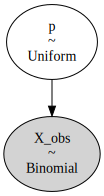

In [28]:
# „Ç≥„É≥„ÉÜ„Ç≠„Çπ„ÉàÂÆöÁæ©
model2 = pm.Model()

with model2:
  # pm.Uniform()„ÅØ‰∏ÄÊßòÂàÜÂ∏É„ÇíË°®„Åô
  p = pm.Uniform('p', lower = 0.0, upper = 1.0)
  
  # pm.Binomial()„ÅØ‰∫åÈ†ÖÂàÜÂ∏É„ÇíË°®„Åô
  # p:ÊàêÂäüÁ¢∫Áéá
  # n:Ë©¶Ë°åÂõûÊï∞
  X_obs = pm.Binomial('X_obs', p=p, n = 5, observed = X.sum())

g = pm.model_to_graphviz(model2)
display(g)


- „Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„Å®Áï∞„Å™„Çä„ÄÅÁπ∞„ÇäËøî„ÅóË°®Ë®ò„ÅåÁÑ°„Åè„Å™„Å£„Å¶„Çã

In [30]:
with model2:
  idata2_1 = pm.sample(
    # # ‰π±Êï∞Á≥ªÂàó„ÅÆÊï∞Ôºà„Éá„Éï„Ç©„É´„ÉàÔºâ
    # chains = 3,
    # # Êç®„Å¶„Çã„Çµ„É≥„Éó„É´Êï∞
    # tune = 2000,
    # # ÂèñÂæó„Åô„Çã„Çµ„É≥„Éó„É´Êï∞
    # draws = 2000,
    random_seed = 42
  )


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Text(0.5, 1.0, '„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ‰∫åÈ†ÖÂàÜÂ∏ÉÁâà')

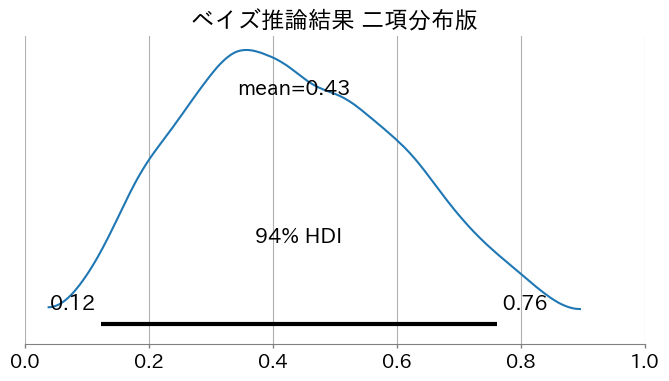

In [31]:
# plot_posterior()„ÅßÁ¢∫ÁéáÂàÜÂ∏É„ÇíÂèØË¶ñÂåñ
ax = az.plot_posterior(idata2_1)
ax.set_xlim(0, 1) # xËª∏„ÅÆÁØÑÂõ≤„Çí0„Åã„Çâ1„Å´ÈôêÂÆö
ax.set_title('„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ‰∫åÈ†ÖÂàÜÂ∏ÉÁâà') # „Çø„Ç§„Éà„É´„ÅÆË®≠ÂÆö

## „Éô„Ç§„Ç∫Êé®Ë´ñÔºàË©¶Ë°åÂõûÊï∞„ÇíÂ¢ó„ÇÑ„ÅôÔºâ
- ‰∫åÈ†ÖÂàÜÂ∏É„ÅÆ„Åæ„Åæ„ÄÅË©¶Ë°åÂõûÊï∞„ÇíÂ§â„Åà„Çã

In [32]:
# „Ç≥„É≥„ÉÜ„Ç≠„Çπ„ÉàÂÆöÁæ©
model3 = pm.Model()

with model3:
  # pm.Uniform()„ÅØ‰∏ÄÊßòÂàÜÂ∏É„ÇíË°®„Åô
  p = pm.Uniform('p', lower = 0.0, upper = 1.0)
  
  # pm.Binomial()„ÅØ‰∫åÈ†ÖÂàÜÂ∏É„ÇíË°®„Åô
  # p:ÊàêÂäüÁ¢∫Áéá
  # n:Ë©¶Ë°åÂõûÊï∞
  X_obs = pm.Binomial('X_obs', p=p, n = 50, observed = 20)

In [33]:
with model3:
  idata3_1 = pm.sample(
    # # ‰π±Êï∞Á≥ªÂàó„ÅÆÊï∞Ôºà„Éá„Éï„Ç©„É´„ÉàÔºâ
    # chains = 3,
    # # Êç®„Å¶„Çã„Çµ„É≥„Éó„É´Êï∞
    # tune = 2000,
    # # ÂèñÂæó„Åô„Çã„Çµ„É≥„Éó„É´Êï∞
    # draws = 2000,
    random_seed = 42
  )


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Text(0.5, 1.0, '„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ‰∫åÈ†ÖÂàÜÂ∏ÉÁâà')

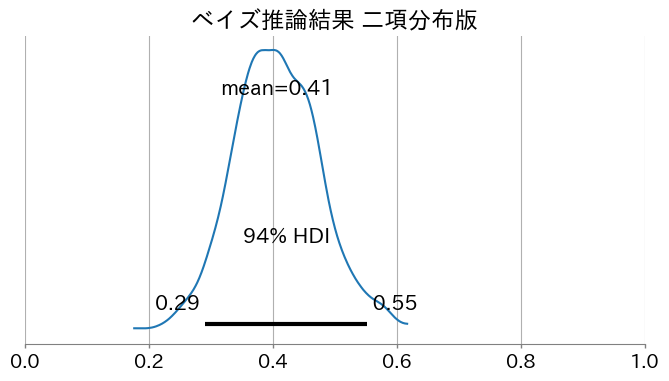

In [34]:
# plot_posterior()„ÅßÁ¢∫ÁéáÂàÜÂ∏É„ÇíÂèØË¶ñÂåñ
ax = az.plot_posterior(idata3_1)
ax.set_xlim(0, 1) # xËª∏„ÅÆÁØÑÂõ≤„Çí0„Åã„Çâ1„Å´ÈôêÂÆö
ax.set_title('„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ‰∫åÈ†ÖÂàÜÂ∏ÉÁâà') # „Çø„Ç§„Éà„É´„ÅÆË®≠ÂÆö

### „Éô„Ç§„Ç∫Êé®Ë´ñÔºà‰∫ãÂæåÂàÜÂ∏É„ÅÆÂ§âÊõ¥Ôºâ

In [44]:
# „Ç≥„É≥„ÉÜ„Ç≠„Çπ„Éà
model4 = pm.Model()

with model4:
  # ‰∏ÄÊßòÂàÜÂ∏É
  p = pm.Uniform('p', lower = 0.1, upper = 0.9)
  
  # 5Âõû‰∏≠2ÂõûÊàêÂäü
  X_obs = pm.Binomial('X_obs', p=p, n = 5, observed = 2)
  
  idata4 = pm.sample(random_seed = 42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Text(0.5, 1.0, '„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ‰∫åÈ†ÖÂàÜÂ∏ÉÁâà')

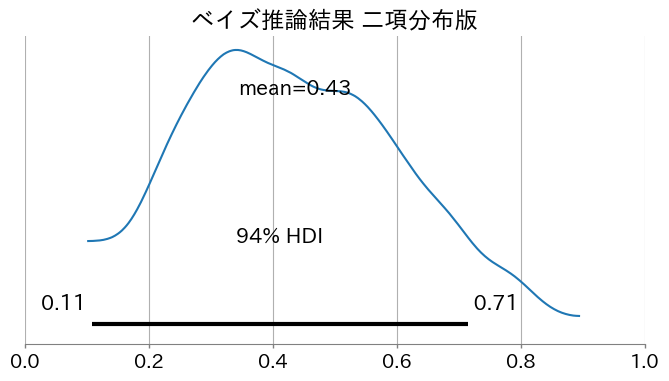

In [45]:
# plot_posterior()„ÅßÁ¢∫ÁéáÂàÜÂ∏É„ÇíÂèØË¶ñÂåñ
ax = az.plot_posterior(idata4)
ax.set_xlim(0, 1) # xËª∏„ÅÆÁØÑÂõ≤„Çí0„Åã„Çâ1„Å´ÈôêÂÆö
ax.set_title('„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú ‰∫åÈ†ÖÂàÜÂ∏ÉÁâà') # „Çø„Ç§„Éà„É´„ÅÆË®≠ÂÆö

In [46]:
# summary()„ÅßÁµ±Ë®àÈáè„ÇíË°®Á§∫
summary = az.summary(idata4)
display(summary)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p 0.435 0.169   0.108    0.714      0.006    0.004   719.000   669.000  1.000

### „Éô„Éº„ÇøÂàÜÂ∏É„ÅßÁõ¥Êé•Á¢∫ÁéáÂàÜÂ∏É„ÇíÊ±Ç„ÇÅ„Çã

- ‰ªäÂõû„ÄÅ„Éô„Ç§„Ç∫Êé®Ë´ñ„ÅÆÂØæË±°„Å´„Åó„Å¶„ÅÑ„ÇãÁ¢∫Áéá„É¢„Éá„É´„ÅØ„ÄÅÁ¢∫ÁéáÂàÜÂ∏É„Å®„Åó„Å¶„ÅØÁ¨¨‰∫åÁ´†„ÅßË™¨Êòé„Åó„Åü„Éô„Éº„ÇøÂàÜÂ∏É„Å´„Å™„Çã„Åì„Å®„Åå„ÄÅÊï∞Â≠¶ÁöÑ„Å´Ë®ºÊòé
- „Åì„ÅÆ„Åì„Å®„Çí„ÄÅË©¶Ë°åÂõûÊï∞„ÇíÂ¢ó„ÇÑ„Åó„ÅüÂâçËø∞„ÅÆÁ¢∫ÁéáÂàÜÂ∏É„ÅÆ„Ç∞„É©„Éï„Å®ÂØæÂøú„Åô„Çã„Åπ„Éº„ÅüÂàÜÂ∏É„ÅÆ„Ç∞„É©„Éï„ÅÆÈáç„Å≠Êõ∏„Åç„ÅßÁ¢∫Ë™ç„Åô„Çã


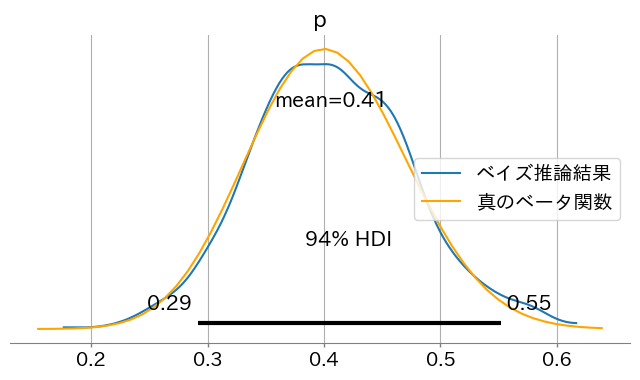

In [47]:
# Áúü„ÅÆ„Éô„Éº„ÇøÈñ¢Êï∞
from scipy import stats
alpha = 20 + 1
beta = 30 + 1

true_beta = stats.beta(alpha, beta)

# „Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú„ÅÆÂèØË¶ñÂåñ
# idata3„ÅØÂâçËø∞„ÅÆ„ÇÇ„ÅÆ„ÇíÂà©Áî®
ax = az.plot_posterior(idata3_1)
ax.lines[0].set_label('„Éô„Ç§„Ç∫Êé®Ë´ñÁµêÊûú')

# Áúü„ÅÆ„Éô„Éº„ÇøÈñ¢Êï∞„ÅÆÊèèÁîª
x = np.linspace(*ax.get_xlim())
ax.plot(x, true_beta.pdf(x), label='Áúü„ÅÆ„Éô„Éº„ÇøÈñ¢Êï∞', color='orange')
ax.legend(loc = 'center right')